In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bezier curves

A real polynomial of a real variable $r \in \mathbb{R}$ with degree $n\geq 1$ is a function of the form

\begin{equation}
p(t) = a_0+a_1t+...+a_nt^n = \sum_{i=0}^n a_it^{i}
\end{equation}

if we denote this as $\pi_n$; the linear space, with dimension $n+1$, of all such polynomials where the functions $1,t,...,t^n$ form the basis of $\pi_n$ known as the monomial basis.

### Bernstein polynomials

An alternative basis for $\pi_n$ used to construct Bezier curves. The $i$-th Bernstein polynomial of degree $n$ is

\begin{equation}
    B_i^n(t) = {n \choose i}t^i(1-t)^{n-1}
\end{equation}

where $0 \leq i\leq n$ 

\begin{equation}
    {n \choose i} = \frac{n!}{i!(n-i)!}
\end{equation}

Have that 

\begin{equation}
    \sum_{i=0}^nB_i^n(t) = 1
\end{equation}

### Bezier curves

parametric polynomial
\begin{equation}
p(t) = \sum_{i=0}^n a_it^{i}
\end{equation}
with Bernstein basis
\begin{equation}
p(t) = \sum_{i=0}^n c_iB_i^{n}
\end{equation}
The points $c_i$ are called control points of $p$. The curve is usually restricted to the parameter domain $[0,1]$, but is also defined for $t$ outside this domain. The polygon connecting all $c_i$ is called the control polygon of $p$.

From Bernstein polynomials the Bezier curve get its endpoints $p(0)=c_0$ and $p(1)=c_n$.

Bezier curves are affinely invariant.

In [175]:
from scipy.special import factorial as fact

def get_length(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    return np.sqrt(np.abs(x1-x2)**2+np.abs(y1-y2)**2)

def control_line(p1,p2,num):
    case = 0 # standard case
    if p1[0] < p2[0]:
        x1,y1 = p1
        x2,y2 = p2
    if p1[0] > p2[0]:
        case = 1
        x1,y1 = p2
        x2,y2 = p1
    #l = np.sqrt(np.abs(x1-x2)**2+np.abs(y1-y2)**2)
    if np.diff((x1,x2)) == 0:
        x = np.ones(num)*y1
        y = np.linspace(min(y1,y2),max(y1,y2),num)
        if case:
            x = np.flip(x)
            y = np.flip(y)
        return np.column_stack((x,y))
    elif np.diff((y1,y2)) == 0:
        x = np.linspace(min(x1,x2),max(x1,x2),num)
        y = np.ones(num)*x1
        if case:
            x = np.flip(x)
            y = np.flip(y)
        return np.column_stack((x,y))
    else:
        x = np.linspace(min(x1,x2),max(x1,x2),num)
        (np.diff((x1,x2))/np.diff((y1,y2))) * (t-min(x1,x2)) + min(y1,y2)
        y = np.linspace(min(y1,y2),max(y1,y2),num)
        if case:
            x = np.flip(x)
            y = np.flip(y)
        return np.column_stack((x,y))
    
def parametrize(C,num):
    """
    If more than two points, set connecting points next to each other
    """
    p = np.zeros(num)
    linenum = C.T[0].shape[0] - 1
    linesx = np.zeros((num,linenum))
    linesy = np.zeros((num,linenum))
    for i in range(linenum):
        line = control_line(C[i],C[i+1],num)
        linesx[:,i] = line.T[0]
        linesy[:,i] = line.T[1]
    return linesx,linesy
            
            
def Bezier(C,num):            
    #T = np.linspace(0,1,num)
    for i,c_i in enumerate(C):
        for j,t in enumerate(T):
            p[i] += c_i*B(t,C.shape[0],i)
    return p

def B(t,n,i): #Bernstein polynomial basis
    return (fact(n) / (fact(i)*fact(n-i)))*t**i*(1-t)**(n-1)

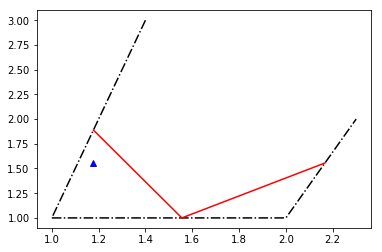

In [220]:
C = C = np.array([(1.4,3),(1,1),(2,1),(2.3,2)])
cx,cy = parametrize(C,10)
plt.plot(C.T[0][:2],C.T[1][:2],'k-.',label='Control polygon')
plt.plot(C.T[0][1:],C.T[1][1:],'k-.')
plt.plot(cx[5],cy[5],'r-')
cx2,cy2 = parametrize(np.column_stack((cx[5],cy[5])),10)
plt.plot(cx2[0,0],cy2[0,0],'b^')
plt.show()

In [162]:
n = 10
t = np.linspace(0,1,10)
C = np.array([(1,1),(2,1),(1.4,3)])
#Plot control points
plt.plot(C.T[0],C.T[1],'o',label='Control points')
# Plot Control polygon
plt.plot(C.T[0][:2],C.T[1][:2],'k-.',label='Control polygon')
plt.plot([C.T[0][0],C.T[0][2]],[C.T[1][0],C.T[1][2]],'k-.')
# Plot Bezier curve
lx,ly = parametrize(C,n)
print(lx.shape)
plt.plot(lx[5][0],ly[5][0],'g^',lx[5][1],ly[5][1],'g^')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-162-00488d364833>, line 11)

### The de Casteljau algorithm

